In [ ]:
import tensorflow

In [ ]:
print(tensorflow.__version__)

2.9.2


In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import tensorflow as tf
import seaborn as sns
#importing all libraries

In [2]:
mnist=tf.keras.datasets.mnist

In [3]:
(X_train_full,y_train_full),(X_test,y_test)=mnist.load_data()
#downloading the dataset from keras

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
X_train_full.shape

(60000, 28, 28)

so this dataset is containing 60000 images of 28x28 pixels 


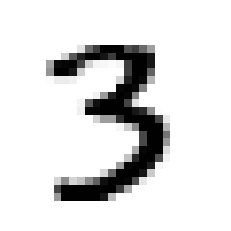

In [5]:
plt.imshow(X_train_full[10000],cmap='binary')
plt.axis("off")
plt.show()

this is an image at the index 10000 . that represents the digit 3

In [6]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

#we are scaling the data to a value between 1 and 0 . we can achieve it by dividing the value by 255

In [7]:
X_test = X_test / 255.

#scale the test data too

In [8]:
#lets see the shapes of the datas

print(X_valid.shape)
print(X_train.shape)
print(y_valid.shape)
print(y_train.shape)

(5000, 28, 28)
(55000, 28, 28)
(5000,)
(55000,)


5000 images we set for validating the model , 55000 images for training

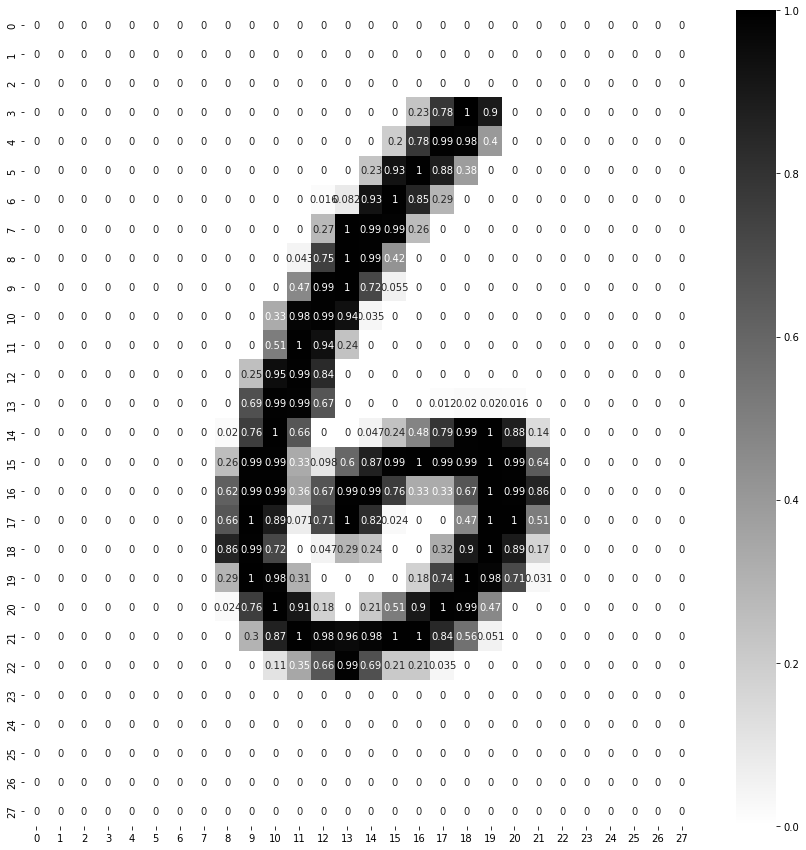

In [9]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train[1000],annot=True,cmap="binary")

In [10]:
#lets define the layers of neural network and make it a list , then store it into a variable

LAYERS=[tf.keras.layers.Flatten(input_shape=[28,28],name="inputlayer"),
        tf.keras.layers.Dense(300,activation='relu',name="hiddenlayer1"),
        tf.keras.layers.Dense(100,activation='relu',name="hiddenlayer2"),
        tf.keras.layers.Dense(10,activation='softmax',name="outputlayer")]


# flattening is used to convert the 2D into into 1D , We can not feed a 2D data into neaural network
# we are setting the hidden layer 1 is 300 neurons and hidden layer 2 to 100 neurons 
# output neurons are 10 , because we have 10 output classes (0-9)
# activatation function is RELU for hidden layers
# activation function is SOFTMAX for ouput layer

In [11]:
#define the classifier model using the below command

model_clf=tf.keras.models.Sequential(LAYERS)

In [12]:
model_clf.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


this is the summary of our classifier , we training total of 2,66,610 parameters

In [13]:
#define the hyperparameters

LOSS_FUNCTION="sparse_categorical_crossentropy"
OPTIMIZER="ADAM"
METRICS=["accuracy"]

#compile the model

model_clf.compile(loss=LOSS_FUNCTION,optimizer=OPTIMIZER,metrics=METRICS)

In [16]:
hidden1=model_clf.layers[1]
weights,biases=hidden1.get_weights()

print(weights)
print(biases)

[[ 0.06641799 -0.04116812  0.0282878  ...  0.04401124 -0.02537343
  -0.00288974]
 [-0.05001541 -0.06880406  0.06010634 ...  0.00138415 -0.06173373
   0.00670846]
 [ 0.03509365 -0.05386413  0.01305182 ... -0.05295548 -0.03371542
   0.06662866]
 ...
 [-0.06334563  0.04585665 -0.04547104 ... -0.01042023 -0.05067806
  -0.02608525]
 [ 0.0500659   0.03011267  0.01597279 ... -0.04315309  0.00412192
   0.01021691]
 [-0.05154975 -0.02494453  0.01309261 ...  0.06110916 -0.05082534
  -0.0304097 ]]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

In [17]:
EPOCHS=5
VALIDATION_SET=(X_valid,y_valid)
history=model_clf.fit(X_train,y_train,epochs=EPOCHS,validation_data=VALIDATION_SET)

#fit our model with epochs =5 

Epoch 1/5
1719/1719 [==============================] - 7s 3ms/step - loss: 0.2131 - accuracy: 0.9361 - val_loss: 0.1081 - val_accuracy: 0.9690
Epoch 2/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0862 - accuracy: 0.9736 - val_loss: 0.0866 - val_accuracy: 0.9750
Epoch 3/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0590 - accuracy: 0.9815 - val_loss: 0.0825 - val_accuracy: 0.9764
Epoch 4/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0436 - accuracy: 0.9859 - val_loss: 0.0761 - val_accuracy: 0.9776
Epoch 5/5
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0333 - accuracy: 0.9893 - val_loss: 0.0732 - val_accuracy: 0.9796


In [19]:
#now lets save our model

import time 
import os
def saveModel_path(model_dir="/content/SAVED_MODELS/"):
  os.makedirs(model_dir, exist_ok=True)
  fileName = time.strftime("Model_%Y_%m_%d_%H_%M_%S_.h5")
  model_path = os.path.join(model_dir, fileName) 
  print(f"your model will be saved at the following location\n{model_path}")
  return model_path

model_clf.save(saveModel_path())

your model will be saved at the following location
/content/SAVED_MODELS/Model_2023_01_24_18_22_29_.h5


In [20]:
history.params

{'verbose': 1, 'epochs': 5, 'steps': 1719}

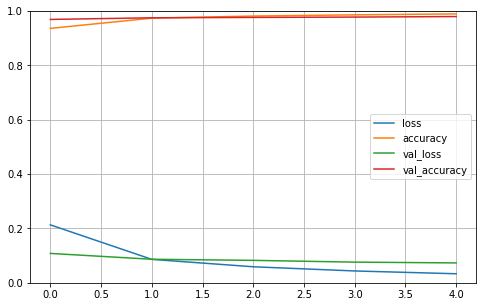

In [21]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [22]:
#lets evaluate the model

model_clf.evaluate(X_test,y_test)[1]

313/313 [==============================] - 1s 2ms/step - loss: 0.0753 - accuracy: 0.9786


0.978600025177002

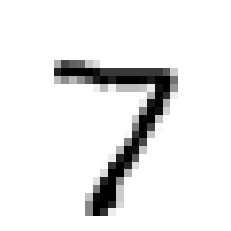

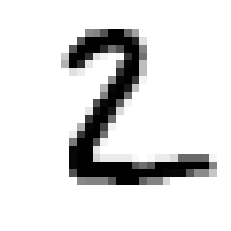

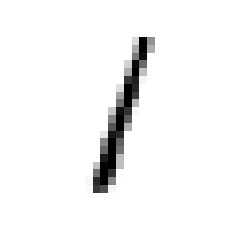

In [23]:
for i in range(0,3):
  plt.imshow(X_test[i],cmap='binary')
  plt.axis("off")
  plt.show()

#seeing the 1st three images

In [24]:
prediction=model_clf.predict(X_test[:3])

#make the prediction for these 3 images

1/1 [==============================] - 0s 63ms/step


In [26]:
prediction

array([[2.0874768e-06, 1.2690222e-08, 1.6983864e-07, 1.0583691e-06,
        7.4104578e-10, 1.4436435e-08, 2.2557942e-10, 9.9964535e-01,
        1.6463626e-06, 3.4962679e-04],
       [1.9284699e-11, 8.1628810e-09, 1.0000000e+00, 2.6185818e-08,
        3.9767357e-14, 2.7083430e-13, 1.4662822e-12, 5.8681816e-11,
        1.2773649e-10, 1.5378402e-13],
       [6.0901903e-07, 9.9991441e-01, 3.3521468e-07, 7.4773503e-09,
        2.1141886e-05, 2.7453567e-07, 9.4936240e-07, 6.0985829e-05,
        1.2440953e-06, 5.1355091e-08]], dtype=float32)

In [27]:
#softmax function will give the probability for each output class
#by using numpy, we can see which number have the maximum probability and we will get to know if the prediction is right or wrong

y_prob=prediction[0]
np.argmax(y_prob.round(5))

7

predicted value is 7 , and we got it right!!

In [28]:
y_prob=prediction[1]
np.argmax(y_prob.round(5))

2

In [29]:
y_prob=prediction[2]
np.argmax(y_prob.round(5))

1

3 of our predictions are right !!

In [35]:
from tensorflow.keras.models import load_model
model=load_model("/content/SAVED_MODELS/Model_2023_01_24_18_22_29_.h5")